In [1]:
import sys

In [2]:
#sys.path.append('/Users/Pradap/Documents/Research/Python-Package/enrique/')
sys.path.append('/scratch/pradap/python-work/enrique/')

In [3]:
import magellan as mg

In [4]:
mg.init_jvm()


True

In [5]:
A = mg.load_dataset('table_A')
B = mg.load_dataset('table_B')

In [6]:
ab = mg.AttrEquivalenceBlocker()
C = ab.block_tables(A, B, 'zipcode', 'zipcode', l_output_attrs=['name', 'hourly_wage', 'zipcode'],
                    r_output_attrs=['name', 'hourly_wage', 'zipcode'])


In [7]:
S = mg.sample_one_table(C, 10)

In [8]:
L = mg.label(S, 'label')

In [9]:
L.save_table('demo_label.pkl')

True

In [10]:
feat_table = mg.get_features_for_blocking(A, B)

In [11]:
S_prime = mg.extract_feat_vecs(L, attrs_after='label', feat_table=feat_table)

In [12]:
dt = mg.DTMatcher(random_state=80)

In [13]:
dt.fit(table=S_prime, exclude_attrs=['_id', 'ltable.ID', 'rtable.ID', 'label'], target_attr='label')

In [14]:
from magellan.debug.decisiontree import visualize_tree

In [15]:
visualize_tree(dt, S_prime.columns, ['_id', 'ltable.ID', 'rtable.ID', 'label'])

Execute the following command in IPython command prompt:

from IPython.display import Image
Image(filename='dt_.png') 


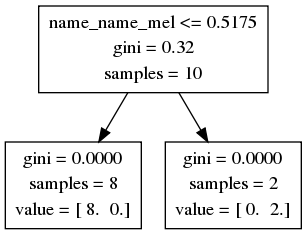

In [16]:
from IPython.display import Image
Image(filename='dt_.png') 

In [17]:
mg.debug_dt(dt, A.ix[2], B.ix[1], feat_table, S_prime.columns, ['_id', 'ltable.ID', 'rtable.ID', 'label'])

Condition name_name_mel <= 0.51748251915 FAILED (  value : 0.781818181818)
Tuples match status : True


In [60]:
A

,ID,name,birth_year,hourly_wage,address,zipcode
0,a1,Kevin Smith,1989,30.0,"607 From St, San Francisco",94107
1,a2,Michael Franklin,1988,27.5,"1652 Stockton St, San Francisco",94122
2,a3,William Bridge,1986,32.0,"3131 Webster St, San Francisco",94107
3,a4,Binto George,1987,32.5,"423 Powell St, San Francisco",94122
4,a5,Alphonse Kemper,1984,35.0,"1702 Post Street, San Francisco",94122


In [61]:
B

,ID,name,birth_year,hourly_wage,address,zipcode
0,b1,Mark Levene,1987,29.5,"108 Clement St, San Francisco",94107
1,b2,Bill Bridge,1986,32.0,"3131 Webster St, San Francisco",94107
2,b3,Mike Franklin,1988,27.5,"1652 Stockton St, San Francisco",94122
3,b4,Joseph Kuan,1982,26.0,"108 South Park, San Francisco",94122
4,b5,Alfons Kemper,1984,35.0,"170 Post St, Apt 4, San Francisco",94122
5,b6,Michael Brodie,1987,32.5,"133 Clement Street, San Francisco",94107


In [18]:
import numpy as np

In [23]:
t1 = A.ix[2]
t2 = B.ix[1]

In [24]:
from magellan.feature.extractfeatures import apply_feat_fns

In [26]:
f = apply_feat_fns(t1, t2, feat_table)

In [31]:
import pandas as pd

In [36]:
f1 = pd.Series(f)

In [41]:
f1.values[1] = 0

In [59]:
len(mg.diff(S_prime, ['_id', 'ltable.ID', 'rtable.ID', 'label']))

22

In [53]:
fn1 = list(feat_table['feature_name'])

In [49]:
fn2 = list(S_prime.columns)

In [57]:
len([f not in fn1 for f in fn2])

26

In [38]:
clf = dt.clf

In [42]:
clf.predict_proba(f1.values)

ValueError: Number of features of the model must  match the input. Model n_features is 21 and  input n_features is 22 

In [30]:
tt.values

AttributeError: 'builtin_function_or_method' object has no attribute 'values'

In [17]:
A.ix[2]

ID                                         a3
name                           William Bridge
birth_year                               1986
hourly_wage                                32
address        3131 Webster St, San Francisco
zipcode                                 94107
Name: 2, dtype: object

In [18]:
B.ix[1]

ID                                         b2
name                              Bill Bridge
birth_year                               1986
hourly_wage                                32
address        3131 Webster St, San Francisco
zipcode                                 94107
Name: 1, dtype: object